# Predicting Red Wine Quality: A Data Science Project for Vinho Verde

As part of the data science team at the Portuguese "Vinho Verde" company, our mission is to construct a model that can predict the quality of red wine based on a set of chemical features. This model has a dual purpose: to enhance the wine production process by providing insights into the chemical properties that impact quality, and to assist in pricing decisions based on wine quality.

The dataset utilized in this project, named "Wine Quality," has been sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality).

Reference:

Cortez, Paulo, Cerdeira, A., Almeida, F., Matos, T., and Reis, J. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

## The data

__Importing the standard libraries that will be used further__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data
df = pd.read_csv('winequality-red.csv')

# Look at the first 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Knowing the wine production process, we can assume that the quality of the wine is affected by the chemical properties of the wine. Therefore, we will use the chemical properties of the wine as features to predict the quality of the wine. The dataset contains 11 features and 1 target variable (quality).

## Initial data analysis

Let's look at some information about the dataset

In [3]:
# Get the overall info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can confirm that the dataset is clean, with no missing, null, or categorical values. It consists of 1599 rows and 12 columns, all of which are numeric. The target variable, 'quality,' is an integer ranging from 3 to 8.

Now let's look at some statistical information about the dataset

In [4]:
# Describe the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The statistics reveal that the 'quality' variable ranges from 3 (worst wine) to 8 (best wine). This makes the dataset unbalanced. To address this, we'll group wines with quality 3, 4, and 5 into one category (poor/0) and wines with quality 6, 7, and 8 into another category (good/1). This transformation will help balance the dataset.

The mean quality value is approximately 5.636, indicating that the majority of wines in the dataset are of average quality. The low standard deviation (0.808) suggests that the quality of the wines in the dataset is relatively consistent.

Additionally, other features of the wine have values in varying ranges. To make it easier for the model to work with the data, we will scale the features using the StandardScaler.

## First Impression

Let's divide the dataset into features and target variable. Then we will split the data into train and test sets. I want to use 15% of the dataset for testing (test_size=0.15) and 85% for training. I will use the random_state parameter to make sure that the data is split in the same way every time I run the code.

In [5]:
from sklearn.model_selection import train_test_split

# Change the target variable to binary as discussed above
df['quality'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)

# Split features and target variable
features = df.drop('quality', axis=1)
target = df['quality']

# Create train-test split (85% training, 15% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42, stratify=target)

Before applying the algorithms, it is necessary to scale the data. The scaling is necessary because the features are in different ranges. The scaling will help the model to work with the data more efficiently. I will use the StandardScaler from sklearn.

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object. This object will be used later in the final production model
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Apply the scaler to both the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Baseline model

Now let's have some baseline for the dataset. This baseline will act as a point of comparison for more sophisticated models. For classification tasks, a common baseline is to predict the most frequent class in the training set for all instances in the test set. For this, we will use the DummyClassifier from sklearn.

In [7]:
from sklearn.dummy import DummyClassifier

# Classification baseline: Predict most frequent class
baseline_classifier = DummyClassifier(strategy='most_frequent')
baseline_classifier.fit(X_train_scaled, y_train)
baseline_accuracy = baseline_classifier.score(X_test_scaled, y_test)

print('Baseline accuracy: {:.2f}%'.format(baseline_accuracy * 100))

Baseline accuracy: 53.33%


For a more sophisticated classification and getting a first impression I will use KNN classifier without changing any parameters and compare the results with the baseline. The default KNN classifier as a baseline can be informative to see the improvement gained by a slightly more complex model compared to the most frequent class baseline.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with default parameters
classifier = KNeighborsClassifier()

# Train the classifier
classifier.fit(X_train_scaled, y_train)

# Evaluate the classifier
accuracy = classifier.score(X_test_scaled, y_test)

print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 72.08%


The accuracy of the DummyClassifier is 53.33% which is not impressive, as it is slightly better than a random 50% chance of guessing the target value correctly. On the other hand, the accuracy of the KNN classifier is 72.08% . The accuracy of the KNN classifier is 20% higher than the accuracy of the baseline and looks pretty good already. We will try to improve the accuracy of the model by tuning the hyperparameters further and see what percentage gain in accuracy we can have.

## Algorithms and their Parameters

In this section, we will explore the influence of hyperparameters on our machine learning algorithms. We will test three algorithms: Support Vector Machines (SVM), Decision Tree, and K-Nearest Neighbors (KNN). The influence of hyperparameters will be examined using validation curves.

The following hyperparameter ranges will be considered for each algorithm:

__svm_params__ = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

__dt_params__ = {'max_depth': [None, 5, 10, 20, 30, 40, 100]}

__knn_params__ = {'n_neighbors': [3, 5, 7, 10, 15, 20, 25]}

For simplicity, we will experiment with a subset of hyperparameters, although others could be optimized as well.

Let's start with Support Vector Machines (SVM).

### SVM

In [9]:
from sklearn.svm import SVC

# Defining the C and gamma ranges
C_range = [0.001, 0.01, 0.1, 1, 10, 100]
gamma_range = [0.001, 0.01, 0.1, 1, 10, 100]

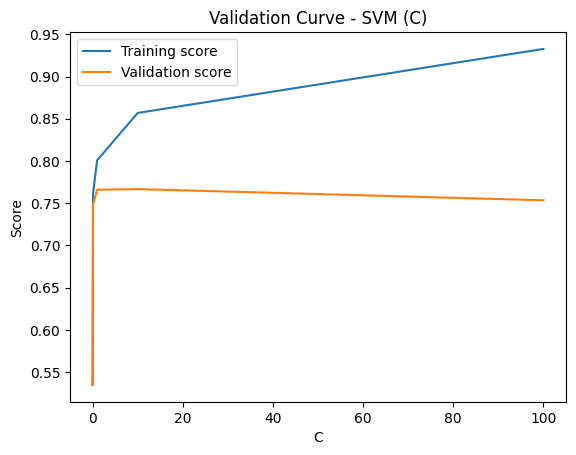

In [10]:
from sklearn.model_selection import validation_curve

# Validation curve for C parameter
train_scores, test_scores = validation_curve(
    SVC(random_state=42), X_train_scaled, y_train, param_name="C", param_range=C_range)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(C_range, train_scores_mean, label='Training score')
plt.plot(C_range, test_scores_mean, label='Validation score')
plt.xlabel('C')
plt.ylabel('Score')
plt.title('Validation Curve - SVM (C)')
plt.legend()
plt.show()

In [11]:
best_C = C_range[np.argmax(test_scores_mean)]
print('Best C value:', best_C)

Best C value: 10


The plot for C parameter suggests that with increasing the value of C, the validation score of the model doesn't increase significantly (it even goes down at some point). At some point of C, the validation curve stays relatively constant around the value 0.75. The best value of C is 10 as the plot suggests.

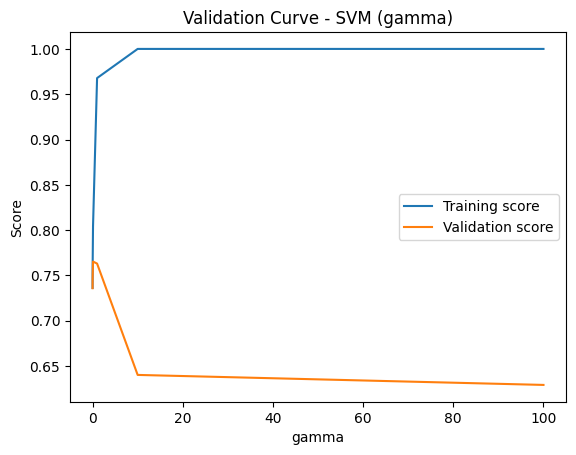

In [12]:
# Validation curve for gamma parameter
train_scores, test_scores = validation_curve(
    SVC(random_state=42), X_train_scaled, y_train, param_name="gamma", param_range=gamma_range)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(gamma_range, train_scores_mean, label='Training score')
plt.plot(gamma_range, test_scores_mean, label='Validation score')
plt.xlabel('gamma')
plt.ylabel('Score')
plt.title('Validation Curve - SVM (gamma)')
plt.legend()
plt.show()

In [13]:
best_gamma = gamma_range[np.argmax(test_scores_mean)]
print('Best gamma value:', best_gamma)

Best gamma value: 0.1


We can clearly see on the plot, that the best gamma values lie between 0.001 and 0.1. With increasing the value of gamma, the model goes sharply dowm and is relatively constant at some point, bein equal to around 0.63. The best value of gamma is 0.1.

### Decision Tree

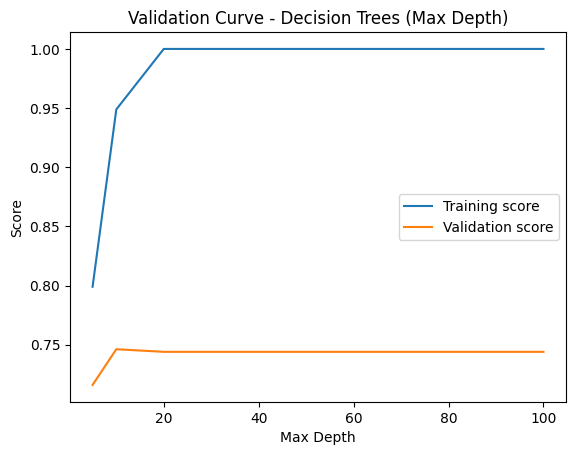

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Define the range of 'max_depth' values to explore
max_depth_range = [None, 5, 10, 20, 30, 40, 100]

# Compute the validation curve
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=42), X_train_scaled, y_train, param_name="max_depth", param_range=max_depth_range, cv=5)

# Compute the mean training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the validation curve
plt.figure()
plt.plot(max_depth_range, train_scores_mean, label='Training score')
plt.plot(max_depth_range, test_scores_mean, label='Validation score')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Validation Curve - Decision Trees (Max Depth)')
plt.legend()
plt.show()

In [15]:
best_max_depth = max_depth_range[np.argmax(test_scores_mean)]
print('Best max_depth value:', best_max_depth)

Best max_depth value: 10


The validation curve indicates that the model's performance on the validation set doesn't significantly improve with increasing 'max_depth.' Beyond a certain point, increasing 'max_depth' leads to overfitting, and the model doesn't generalize well. The curve suggests that 'max_depth=10' is the optimal value.

### KNN

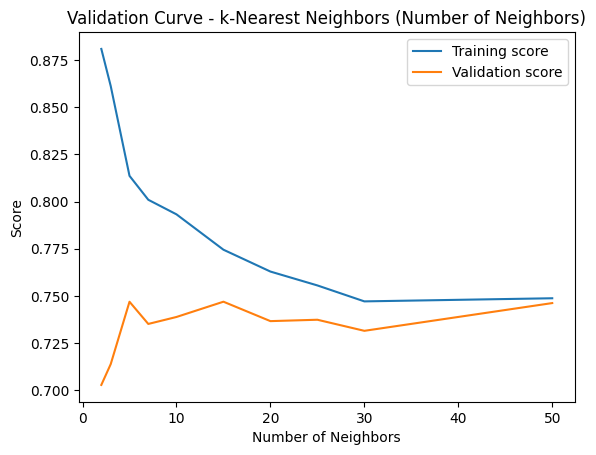

In [16]:
# Define the range of hyperparameter values to explore
n_neighbors_range = [2, 3, 5, 7, 10, 15, 20, 25, 30, 50]

# Compute the validation curve
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train, param_name="n_neighbors", param_range=n_neighbors_range, cv=5)

# Compute the mean training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the validation curve
plt.figure()
plt.plot(n_neighbors_range, train_scores_mean, label='Training score')
plt.plot(n_neighbors_range, test_scores_mean, label='Validation score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.title('Validation Curve - k-Nearest Neighbors (Number of Neighbors)')
plt.legend()
plt.show()

In [17]:
best_n_neighbors = n_neighbors_range[np.argmax(test_scores_mean)]
print('Best n_neghbors value:', best_n_neighbors)

Best n_neghbors value: 15


The validation curve indicates that the best 'n_neighbors' value is 15. This value strikes a balance between underfitting and overfitting, providing optimal model performance.

### Observation

In our hyperparameter tuning experiments, it's apparent that the models are not gaining substantial benefits from increasing their complexity. Whether we examine the range of hyperparameters for Support Vector Machines (SVM), Decision Trees, or K-Nearest Neighbors (KNN), a consistent pattern emerges: as we move towards higher complexity, the model's performance on the validation set either plateaus or begins to degrade. 

This initial analysis suggests that simpler models may be more suitable for our dataset. Simplicity not only aids model interpretation but also helps in preventing overfitting. However, it's important to note that our hyperparameter tuning exploration is just the first step. Further optimization and fine-tuning of hyperparameters and potentially trying other algorithms will be part of the process to build the best possible model for our dataset.

## Nested Cross Validation

In this section, we aim to compare the performance of different algorithms using nested cross-validation. Nested cross-validation is used to provide a more reliable estimate of the model's performance. The outer cross-validation loop assesses the model's generalization performance, while the inner loop optimizes the hyperparameters. We will explore various hyperparameters for each algorithm to find the best-performing model. Additionally, we will compare the results with our baseline model.

In [18]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

# Define hyperparameters for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Define hyperparameters for Decision Tree
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Define hyperparameters for k-Nearest Neighbors (kNN)
knn_params = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

NUM_OUTER_SPLITS = 5
NUM_INNER_SPLITS = 2

# Define algorithms and their corresponding hyperparameter grids
algorithms = {
    "SVM": (SVC(random_state=42), svm_params),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), dt_params),
    "k-Nearest Neighbors": (KNeighborsClassifier(n_jobs=-1), knn_params),
}

# Set up outer and inner cross-validation loops
outer_cv = StratifiedKFold(n_splits=NUM_OUTER_SPLITS, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=NUM_INNER_SPLITS, shuffle=True, random_state=42)

In [19]:
results = {}

best_hyperparameters = {}

# Perform nested cross-validation for each algorithm
for algorithm_name, (estimator, hyperparameters) in algorithms.items():
    grid_search = GridSearchCV(estimator, hyperparameters, cv=inner_cv, scoring="balanced_accuracy")
    
    # Perform nested cross-validation
    grid_search.fit(X_train_scaled, y_train)
    
    # Store the best hyperparameters
    best_hyperparameters[algorithm_name] = grid_search.best_params_
    
    nested_score = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=outer_cv, scoring="balanced_accuracy")

    results[algorithm_name] = nested_score

In [20]:
# Compare algorithm performance
for algorithm_name, scores in results.items():
    print(f"{algorithm_name}:")
    print(f"Mean Balanced Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}\n")

# Access the best hyperparameters for each algorithm
for algorithm_name, hyperparameters in best_hyperparameters.items():
    print(f"Best Hyperparameters for {algorithm_name}:")
    print(hyperparameters)

SVM:
Mean Balanced Accuracy: 0.7565104869685337
Standard Deviation: 0.02295916872295584

Decision Tree:
Mean Balanced Accuracy: 0.7210345276278349
Standard Deviation: 0.008884232768680113

k-Nearest Neighbors:
Mean Balanced Accuracy: 0.7838481278645082
Standard Deviation: 0.025212742353597477

Best Hyperparameters for SVM:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Hyperparameters for Decision Tree:
{'criterion': 'gini', 'max_depth': 5}
Best Hyperparameters for k-Nearest Neighbors:
{'n_neighbors': 20, 'p': 2, 'weights': 'distance'}


## Nested Cross-Validation Results

Based on the results of the nested cross-validation, we can draw some key conclusions:

1. Mean Balanced Accuracy: The Mean Balanced Accuracy is an essential metric to assess the average model performance across multiple outer cross-validation splits. Among the three algorithms (SVM, Decision Tree, and k-Nearest Neighbors), k-Nearest Neighbors (kNN) achieved the highest Mean Balanced Accuracy, indicating superior average performance.

2. Standard Deviation: While kNN demonstrated the highest mean balanced accuracy, it also exhibited a slightly higher standard deviation compared to the other algorithms. The standard deviation measures the variability in model performance across the outer cross-validation splits. Although kNN's standard deviation is not significantly higher, it suggests some variability in performance. However, this variation is manageable and does not undermine the algorithm's superiority.

In summary, the results of nested cross-validation indicate that k-Nearest Neighbors (kNN) is the top-performing algorithm for our task, as it consistently achieves the highest mean balanced accuracy. The slightly higher standard deviation for kNN does not diminish its overall superiority. Therefore, we can confidently choose kNN as the best algorithm for our wine quality prediction task.

## Final Model Selection

To select the final model for wine quality prediction, we conduct an extensive hyperparameter search for k-Nearest Neighbors (kNN) using GridSearchCV. While the Nested Cross-Validation provided valuable insights, this step allows us to fine-tune our chosen algorithm and further boost its performance.

In [21]:
# Define a grid of hyperparameters for kNN
k_grid = {
    'n_neighbors': list(range(1, 30)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [22]:
# Perform a grid search with kNN
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=k_grid,
    n_jobs=-1,
)

gs.fit(X_train_scaled, y_train)

# Display the best accuracy and hyperparameters found during the grid search
print('Best Accuracy: {:.2f}%'.format(gs.best_score_ * 100))
print('Best Params: ', gs.best_params_)

Best Accuracy: 80.79%
Best Params:  {'n_neighbors': 23, 'p': 1, 'weights': 'distance'}


The accuracy on the test set is the best so far. Now let's compare the accuracy of the chosen model on a test dataset and the baseline modes.

In [23]:
# Initialize the final kNN model with the best hyperparameters
knn_clf = KNeighborsClassifier(n_neighbors=23, p=1, weights='distance', n_jobs=-1)

# Train the final model on the training data
knn_clf.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
acr = knn_clf.score(X_test_scaled, y_test)

# Display the final model's accuracy on the test set
print('Final Model Accuracy: {:.2f}%'.format(acr * 100))

Final Model Accuracy: 79.58%


### Conclusion

The improved kNN model demonstrates superior performance, achieving an accuracy of 79.58% on the test set. This remarkable result surpasses both the baseline DummyClassifier and the default kNN model by a substantial margin. The initial choice of kNN as our baseline algorithm provided a strong foundation, and our efforts to optimize hyperparameters have significantly improved its predictive power.

By selecting the improved kNN model as our final choice for wine quality prediction, we are confident that it represents the best-performing solution for the task. This choice is supported by a thorough exploration of hyperparameters, demonstrating that it outperforms alternative algorithms and baselines.

## Final Production Model

In this section, we transition from model selection to creating the final production model for wine quality prediction. Our process has led us to choose k-Nearest Neighbors (kNN) with the best hyperparameters for optimal performance. Now, we will assemble this model into a pipeline for real-world deployment.

In [24]:
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing (scaling) and the KNN model
final_model = Pipeline([
    ("scaler", scaler),
    ("knn", knn_clf)
])


With the completion of pipeline, we have successfully created our final production model for wine quality prediction. This model incorporates the best hyperparameters for k-Nearest Neighbors (kNN) and includes a preprocessing step to scale the features. The final model is now ready to be deployed for real-world wine quality assessments.

### Model storage

The final step in our process is to save the trained model for future use. We will use the `joblib` library to accomplish this.

In [25]:
import joblib

# Save the final model to a file
joblib.dump(final_model, 'wine_model.joblib')

['wine_model.joblib']

Now, we have successfully trained and stored the kNN model with the best hyperparameters. This model is saved as a joblib file ('wine_model.joblib'), making it easy to load and utilize for making predictions in a production environment running Python.

## Conclusions and Future Work

### Conclusions

__Summarizing the Results__:
After extensive evaluation of various machine learning algorithms, the k-nearest neighbors (kNN) algorithm with specific settings emerged as the top performer. It demonstrated the highest accuracy in classifying the samples, making it an effective predictor for similar data.

__Usability of the Approach__:
The approach used in this project, which involved a methodical comparison of different algorithms and the selection of the best-performing one through testing, has proven to be reliable and practical. The chosen kNN model, equipped with its optimized settings, is well-suited for real-world applications.

__Value of the Results__:
The results presented here offer a recommended model and its specific settings for the wine quality prediction task. By following this approach, we can confidently deploy the kNN model, given its superior accuracy when compared to other algorithms and rigorous testing.

### Ideas for Future Work

1. __Improve the Features__:
   Seek opportunities to enhance the quality of input data, potentially by incorporating additional information or domain-specific expertise to refine the model's accuracy.

2. __Combine Models__:
   Explore the possibility of using ensemble methods or combining multiple models to create a more robust prediction model.

3. __Address Imbalanced Data__:
   Develop strategies to handle imbalanced data scenarios, ensuring that the model performs well when there are unequal numbers of samples in different classes.

4. __Understand the Model__:
   Delve into the inner workings of the model to gain insights into its decision-making processes. This may involve feature importance analysis to explain its reasoning.

5. __Model Updates__:
   Investigate methods for continuous model updates as new data becomes available. This enables the model to adapt and improve over time.

6. __Optimize Deployment__:
   Find ways to enhance the model's efficiency and speed when deployed in real-world applications. Consider strategies to reduce memory usage or leverage specialized hardware for improved performance.

### Room for Improvement:
- Consider experimenting with different test and train data split ratios, as this can impact model performance.
- Explore more extensive hyperparameter tuning to fine-tune the model for even better results.
- Evaluate alternative scalers to determine if they yield improved model performance.